<a href="https://colab.research.google.com/github/idrkhowto/Stellar-Mass-Estimates-SDSS_DR12/blob/main/SSDS_granadafiles_dustvs_nodustdiffmethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# import sys and install other dependencies

!pip install astroquery
! pip install astropy
import sys

#Import packages

from astropy.io import fits
from astropy import units
from astropy.table import Table
import numpy as np
import pandas as pd

#Astroquery is what we use to download data from SDSS

from astropy.coordinates import SkyCoord
# from astroquery.sdss import SDSS - import failure
from astropy import constants as const

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

import pickle
pickle.HIGHEST_PROTOCOL = 4

# import visualization dependencies
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

# set the matplotlib style
plt.style.use(astropy_mpl_style)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
# display the image (list image description)
image_file = get_pkg_data_filename(r"/content/drive/MyDrive/granadafiles/granada_fsps_krou_wideform_dust-DR12-boss.fits")
fits.info(image_file)
# no dust file
image_file = get_pkg_data_filename(r"/content/drive/MyDrive/granadafiles/granada_fsps_krou_wideform_nodust-DR12-boss.fits")
fits.info(image_file)

Filename: /content/drive/MyDrive/granadafiles/granada_fsps_krou_wideform_dust-DR12-boss.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    141   1489670R x 51C   [J, J, J, D, D, E, E, I, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, D, D, D, D, D, D, D, J, 5D, 5D, 5D, 5D, 5D, D, D, D, D, D, D, D, D, J, J, J, K, K, K, K, K, K, K, 6A, 6A, B]   
Filename: /content/drive/MyDrive/granadafiles/granada_fsps_krou_wideform_nodust-DR12-boss.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    141   1489670R x 51C   [J, J, J, D, D, E, E, I, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, D, D, D, D, D, D, D, J, 5D, 5D, 5D, 5D, 5D, D, D, D, D, D, D, D, D, J, J, J, K, K, K, K, K, K, K, 6A, 6A, B]   


In [21]:
fits.open('/content/drive/MyDrive/granadafiles/granada_fsps_krou_wideform_dust-DR12-boss.fits')
Table.read('/content/drive/MyDrive/granadafiles/granada_fsps_krou_wideform_dust-DR12-boss.fits')
fits.open('/content/drive/MyDrive/granadafiles/granada_fsps_krou_wideform_nodust-DR12-boss.fits')
Table.read('/content/drive/MyDrive/granadafiles/granada_fsps_krou_wideform_nodust-DR12-boss.fits')

PLATE,MJD,FIBERID,RA,DEC,Z,Z_ERR,ZNUM,MAGSCALED [5],MAGSCALED_ERR [5],KE [5],CMODELABSMAG [5],M2L [5],M2L_MEDIAN [5],M2L_ERR [5],M2L_MIN [5],M2L_MAX [5],LOGMASS,LOGMASS_MEDIAN,LOGMASS_ERR,LOGMASS_MIN,LOGMASS_MAX,CHI2,DELTA_CHI2,NFILTER,PARAM [5],PARAM_MEAN [5],PARAM_ERR [5],PARAM_MIN [5],PARAM_MAX [5],AGE,AGE_MEAN,AGE_MIN,AGE_MAX,SSFR,SSFR_MEAN,SSFR_MIN,SSFR_MAX,WARNING,LEGACY_TARGET1,LEGACY_TARGET2,SPECIAL_TARGET1,SPECIAL_TARGET2,BOSS_TARGET1,EBOSS_TARGET0,ANCILLARY_TARGET1,ANCILLARY_TARGET2,SPECOBJID,RUN2D,RUN1D,SPECPRIMARY
int32,int32,int32,float64,float64,float32,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int64,int64,int64,int64,int64,int64,int64,bytes6,bytes6,uint8
3586,55181,1,9.331911100000013,-0.46295596,0.46511224,0.00027157628,1,23.874088287353516 .. 19.040855407714844,1.8781356811523438 .. 0.1006440594792366,-0.552196592092514 .. -0.599430650472641,-19.514569406283044 .. -22.062060003054285,34.633524517284904 .. 0.5988374098039876,119.15423882973911 .. 0.7488975370843658,79.0095358317788 .. 0.15333434005294236,52.495547379262995 .. 0.5715265873941144,203.4346097400891 .. 0.8998237583707221,11.291049900632887,11.386993562575222,0.10490703153630834,11.261171655582018,11.472080180029817,0.32576034299563617,0.007696609594859183,5,3.8250796794891357 .. 0.6250672354470715,5.943472854482417 .. 0.25377549047140924,1.7459386613273948 .. 0.321055823025992,3.8250796794891357 .. 0.08305299020913524,7.8151750564575195 .. 0.8932045680454345,3.208444833755493,5.494352231534403,3.637796640396118,7.2538838386535645,-2.2217981815338135,-11.977376479802134,-33.0,-2.678969383239746,0,0,0,0,0,14,0,0,0,4037477427739029504,v5_7_0,v5_7_0,1
3586,55181,2,9.330077500000016,-0.62411693,0.71972626,7.575063e-05,1,21.893857955932617 .. 19.291488647460938,0.3792306184768677 .. 0.1279277503490448,-0.48727139830589294 .. -0.31351861357688904,-21.421229360830864 .. -24.353952406179985,1.8883204752028997 .. 0.29626933474885747,1.944809384978249 .. 0.3215917223077797,0.637536336889127 .. 0.07570744413447054,1.408144572646773 .. 0.242911736772675,2.6580465722021023 .. 0.402917497072347,11.431252634151674,11.466346744493428,0.1273611228277161,11.338737094847529,11.57247986891217,6.688808661536314,0.030461162445135415,5,5.155111312866211 .. 2.5666913146704102,4.976152068214762 .. 2.423391378066716,1.495121050780315 .. 1.1488314759949305,3.1600637435913086 .. 1.4400312784083158,6.485143661499023 .. 3.8764077305073728,3.387429714202881,3.2415111477600607,2.1162796020507812,4.289774417877197,-1.0116521120071411,-0.9781050744919487,-1.1030319929122925,-0.8401987552642822,0,0,0,0,0,6,0,0,0,4037477702616936448,v5_7_0,v5_7_0,1
3586,55181,6,9.409153600000025,-0.25005844,0.5329881,0.00015017422,1,23.205322265625 .. 18.823741912841797,0.6705726981163025 .. 0.06467541307210922,-0.5008564889431 .. -0.499971479177475,-22.109319731331027 .. -23.371418043708957,36.685427665105294 .. 0.4514873263856352,43.02311644718421 .. 0.4955296612816962,17.923861357002195 .. 0.1068313482519007,29.36808450017179 .. 0.41896943827265,59.18862604515594 .. 0.634516413079415,11.469810536014144,11.51090477186845,0.10370951047578893,11.431916713672447,11.627620935137845,1.1832527229562402,0.014992598444223404,5,3.1600637435913086 .. 0.4154262586974209,4.270409029608455 .. 0.2607971298540335,1.4977905132118061 .. 0.31806990447127387,3.1600637435913086 .. 0.08305299020913524,5.820127487182617 .. 0.8932045680454345,2.746208906173706,3.8303764620011242,2.653092384338379,5.071660041809082,-2.674182415008545,-8.90095599153286,-18.42917251586914,-2.4615793228149414,0,0,0,0,0,14,0,0,0,4037478802128564224,v5_7_0,v5_7_0,0
3586,55181,7,9.360467299999982,-0.21284117,0.4744246,0.00013510989,1,24.746503829956055 .. 18.951038360595703,0.908759355545044 .. 0.06325465440750122,-0.6422

In [22]:
with fits.open('/content/drive/MyDrive/granadafiles/granada_fsps_krou_wideform_dust-DR12-boss.fits') as hdu:
    
    StellarMassDust_data = Table(hdu[1].data)

with fits.open('/content/drive/MyDrive/granadafiles/granada_fsps_krou_wideform_nodust-DR12-boss.fits') as hdu:
   
    StellarMassNoDust_data = Table(hdu[1].data)
 
StellarMassDust_data.field('LOGMASS')

11.441300811100648
11.392648198922444
11.551720484835677
11.700696754504841
11.551710155965159
11.655817761686766
11.505878176887515
11.60530708336254
11.489338768992006
11.854727368937706
11.431521611889995


Text(0, 0.5, 'Stellar Mass - No Dust, log')

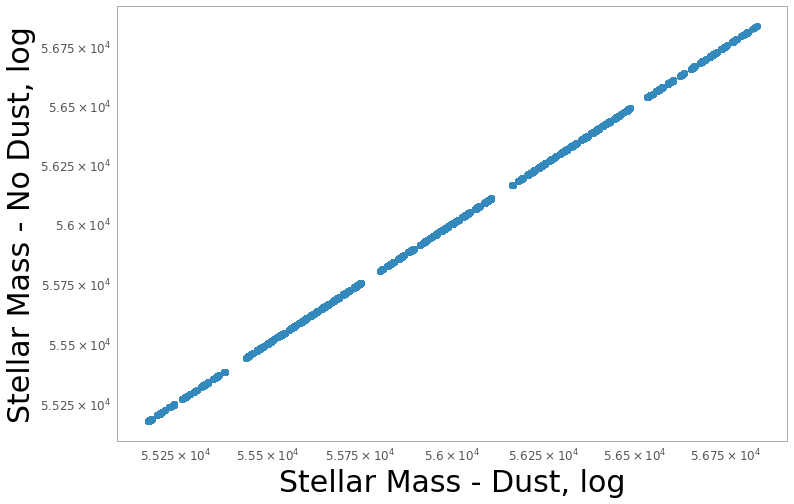

In [23]:
#stellar mass plots

plt.figure(figsize=(12,8))
plt.grid()
plt.xscale('log')
plt.yscale('log')

plt.scatter(StellarMassDust_data.field(1), StellarMassNoDust_data.field(1))

plt.xlabel('Stellar Mass - Dust, log', size = 30)
plt.ylabel('Stellar Mass - No Dust, log', size = 30)